---
title: "Opening positions related to data science"
format:
  html:
    toc: true
    toc-title: Contents
    embed-resources: true
    self-contained: true
    plotly: true
    css: styles.css

execute:
  echo: false
  output: false
jupyter: python3
---

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
df = pd.read_csv("./Dataset/cleaned/all.csv")
df.head(2)

,title,company_name,schedule_type,work_from_home,search_query,platform,Qualifications,Responsibilities,salary_lower_bound,salary_upper_bound,city,state
0,"Cloud Consultant, Big Data and Analytics, Goog...",Google,Full-time,NaN,big data and cloud computing,Karkidi,"Bachelor’s degree in Computer Science, Enginee...",big data analytics cloud consultant work direc...,120000.000000,190000.000000,Reston,VA
1,Big Data Architect,Johnson Technology Systems Inc.,Full-time,NaN,big data and cloud computing,Ladders,Minimum 8-12 years of experience in Data Model...,big data architect responsible designing imple...,176890.555556,275471.086957,Washington,DC


In [3]:
df.isna().sum()

title                   0
company_name            0
schedule_type           1
work_from_home        646
search_query            0
platform                0
Qualifications        405
Responsibilities      418
salary_lower_bound      6
salary_upper_bound      0
city                    0
state                   0
dtype: int64

## Introduction

As the second year of graduate studies is around the corner, it is never too early to start learning about the current status of the job market in terms of our major -- Data Science. Understanding the characteristics and trends in the job market will help us to prepare for our job search more efficiently.

## Data overview

The given data is collected by searching some keywords, including "data scientist", "data analyst", "neural networks", "big data and cloud
computing", "machine learning", 'reinforcement learning', 'deep learning', "time series", "block chain", and "natural language processing".

Among a bunch of features after cleaning, features "state", "salary", "company_name", and "platform" are mainly used.

## Are there significant differences in salaries by state?

Usually salaries in a region are influenced by many factors, such as the main types of industries in the area, the population, etc. Differences in salary levels from state to state are to be expected, so what is it like for DS-related professions?

In [4]:
# group the data by state and calculate the average salary
state_avg_min_salary = df.groupby('state')['salary_lower_bound'].mean().reset_index()
state_avg_min_salary = state_avg_min_salary.loc[state_avg_min_salary["state"]!="Anywhere",]

state_avg_max_salary = df.groupby('state')['salary_upper_bound'].mean().reset_index()
state_avg_max_salary = state_avg_max_salary.loc[state_avg_max_salary["state"]!="Anywhere",]

In [5]:
state_avg_salary = pd.merge(state_avg_min_salary,state_avg_max_salary,on="state" )
state_avg_salary.head()

,state,salary_lower_bound,salary_upper_bound
0,AL,117782.750000,162891.519118
1,AR,87530.723195,142898.994495
2,AZ,95866.666667,311297.872340
3,CA,130131.303316,240672.728899
4,CO,110518.974805,195174.862500


In [20]:
df.loc[df["state"]=="HI",]

,title,company_name,schedule_type,work_from_home,search_query,platform,Qualifications,Responsibilities,salary_lower_bound,salary_upper_bound,city,state
189,Deep Learning Compiler Engineer,Intel Corporation,Full-time,NaN,deep learning,LocalJobs.com,NaN,NaN,217350.0,347090.0,Honolulu,HI
193,Deep Learning Compiler Engineer,Intel Corporation,Full-time,NaN,deep learning,LocalJobs.com,NaN,NaN,217350.0,347090.0,Honolulu,HI


In [6]:
#| output: true
#| fig-cap: Figure 1. Choropleth maps for an annual salary of different states. <br> By choosing one of the labels of the dropdown menu, the lowest and the highest annual salary in different states are shown. The dark the color, the higher the annual salary. 

fig = go.Figure()

fig.add_trace(
    go.Choropleth(
    locations=state_avg_salary['state'],  # Set the location to the state abbreviations
    z=state_avg_salary["salary_lower_bound"],  # Assign data to the data column
    locationmode='USA-states',
    colorscale='Emrld',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Average salary",
    visible=True,
))

fig.add_trace(
    go.Choropleth(
    locations=state_avg_salary['state'],  # Set the location to the state abbreviations
    z=state_avg_salary["salary_upper_bound"],  # Assign data to the data column
    locationmode='USA-states',
    colorscale='Emrld',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Average salary",
    visible=False,
))

# add the dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True, False]}, 
                          {'colorbar': {'title': 'Avg min salary'}}],
                    label='Average min salary',
                    method='update',
                ),
                dict(
                    args=[{"visible": [False, True]}, 
                          {'colorbar': {'title': 'Avg max salary'}}],
                    label='Average max salary',
                    method='update',
                )
            ]),
            direction='down',
            showactive=True,
            x=0.15,
            y=1.0
        )
    ]
)


fig.update_layout(
    title_text='Average annual salary',  # Set the title of the map
    geo_scope='usa',  # Set the projection to US
)

fig.show()

<br>
What is surprising once we see this picture is that the state HI is the darkest in both two maps. The reason for this is found to be that HI only has two open positions from `Intel Corporation` with high lower and upper salary bounds.

Except for the HI, states DE, HI, and UT are the top 3 states with the highest average lower bound of annual salary for all positions. Florida is the state that has the highest average upper bound of annual salary.

## Which job hunting platforms host more open positions?

Different job-hunting platforms have different characteristics. For example, LinkedIn focuses on professional networking and job listings, while Glassdoor provides company reviews, interview insight, etc. as well. Thus, it may vary on the types of work that are more frequently included for different platforms.

In [7]:
platform_cnt = pd.DataFrame(df["platform"].value_counts())
platform_cnt.head(3)

,platform
LinkedIn,66
ZipRecruiter,60
Upwork,56


In [8]:
platform_cnt.reset_index(inplace=True)
platform_cnt.rename(columns={"index":"platform", "platform":"count"},inplace=True)
platform_cnt.head(10)

,platform,count
0,LinkedIn,66
1,ZipRecruiter,60
2,Upwork,56
3,AngelList,36
4,Geebo,32
5,Lever,23
6,Greenhouse,19
7,Clearance Jobs,19
8,Startup Jobs,16
9,Built In,15


In [9]:
platform_title_cnt = df.groupby(["platform","search_query"]).size().reset_index(name='count')
platform_title_cnt

,platform,search_query,count
0,ASK Consulting,data analyst,1
1,ASK Consulting,natural language processing,1
2,AbbVie Careers,data scientist,1
3,Abbott Jobs,data scientist,1
4,Adzuna,data analyst,1
...,...,...,...
360,ZipRecruiter,deep learning,4
361,ZipRecruiter,machine learning,4
362,ZipRecruiter,natural language processing,7
363,ZipRecruiter,neural networks,8


In [10]:
platform_title_cnt = platform_title_cnt.loc[platform_title_cnt["platform"].isin(list(platform_cnt.loc[0:9,"platform"].values)), ]
platform_title_cnt.reset_index(inplace=True)
platform_title_cnt.drop(columns="index",inplace=True)
platform_title_cnt

C:\Users\wxl\AppData\Local\Temp\ipykernel_28632\138710838.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,platform,search_query,count
0,AngelList,block chain,10
1,AngelList,deep learning,6
2,AngelList,machine learning,2
3,AngelList,natural language processing,3
4,AngelList,neural networks,8
...,...,...,...
68,ZipRecruiter,deep learning,4
69,ZipRecruiter,machine learning,4
70,ZipRecruiter,natural language processing,7
71,ZipRecruiter,neural networks,8


In [11]:
#| output: true
#| fig-cap: Figure 2. The Number of Searched Opening Positions on Different Platforms. <br>The total height of a bar means the number of searched results on different platforms, and the color represents the keywords used for search.

fig = px.bar(platform_title_cnt, 
             x="platform", y="count",
             color="search_query", barmode = 'stack',
             category_orders={"platform":list(platform_cnt.loc[0:9,"platform"].values)},
             color_discrete_sequence=px.colors.qualitative.T10,
             labels={
                     "platform": "Job search platforms",
                     "count": "Number of searched results",
                     "search_query": "Search query"
                 },
                title="The Number of Searched Opening Positions on Different Platforms")
 
fig.show()

<br>
For DS-related jobs, LinkedIn has the most opening positions, followed by ZipRecruiter and Upwork. The number of opening positions of different titles, i.e. search query, in LinkedIn, are balanced except for NLP-related and time series analysis related jobs. Upwork has the most positions that are related to neural networks.

## Which companies are posting more jobs and at what salaries?

In [22]:
df["company_name"].value_counts()

Upwork                   56
Booz Allen Hamilton      17
Apple                    15
Deloitte                 10
Walmart                   9
                         ..
Snowflake Computing       1
Base-2 Solutions, LLC     1
Zortech Solutions         1
HexaQuest Global          1
Caterpillar, Inc          1
Name: company_name, Length: 425, dtype: int64

In [ ]:
comp_cnt = df.groupby(["company_name"]).size().reset_index(name='count')
comp_cnt.sort_values(by="count",ascending=False,inplace=True,ignore_index=True)
comp_cnt

,company_name,count
0,Upwork,56
1,Booz Allen Hamilton,17
2,Apple,15
3,Deloitte,10
4,Walmart,9
...,...,...
420,GXO Logistics,1
421,Fusemachines,1
422,Fox Corporation,1
423,Fortinet,1


In [ ]:
comp_salary = pd.merge(df,comp_cnt,on="company_name")
comp_salary = comp_salary.loc[:,["company_name","search_query","salary_lower_bound","salary_upper_bound","count"]]
comp_salary.drop_duplicates(inplace=True,ignore_index=True)
comp_salary

,company_name,search_query,salary_lower_bound,salary_upper_bound,count
0,Google,big data and cloud computing,120000.000000,190000.000000,7
1,Google,big data and cloud computing,118000.000000,177000.000000,7
2,Google,big data and cloud computing,139000.000000,213000.000000,7
3,Google,machine learning,208000.000000,306000.000000,7
4,Johnson Technology Systems Inc.,big data and cloud computing,176890.555556,275471.086957,2
...,...,...,...,...,...
543,HPE1US,reinforcement learning,95100.000000,218700.000000,1
544,Hewlett Packard Enterprise,reinforcement learning,120640.000000,149760.000000,1
545,Experfy,time series analysis,80000.000000,291200.000000,1
546,NASA Jet Propulsion Laboratory California Inst...,time series analysis,80000.000000,100000.000000,1


In [ ]:
comp_salary = comp_salary.loc[comp_salary["company_name"].isin(list(comp_cnt.loc[0:20,"company_name"].values)), ]
comp_salary.reset_index(inplace=True)
comp_salary.drop(columns="index",inplace=True)
comp_salary 

C:\Users\wxl\AppData\Local\Temp\ipykernel_28632\326739513.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,company_name,search_query,salary_lower_bound,salary_upper_bound,count
0,Google,big data and cloud computing,120000.000000,190000.000000,7
1,Google,big data and cloud computing,118000.000000,177000.000000,7
2,Google,big data and cloud computing,139000.000000,213000.000000,7
3,Google,machine learning,208000.000000,306000.000000,7
4,Booz Allen Hamilton,big data and cloud computing,81800.000000,186000.000000,17
...,...,...,...,...,...
92,STR,reinforcement learning,119159.200000,185553.538462,5
93,STR,machine learning,159110.406250,242136.173684,5
94,Walmart,data analyst,81115.786667,127464.894737,9
95,Walmart,data scientist,95136.129032,170968.487778,9


In [ ]:
print(comp_salary.shape)

(97, 5)


In [ ]:
#| output: true
#| fig-cap: Figure 3. Bubble plot for salary lower and upper bound and number of open positions of different companies. <br>The x-axis and y-axis represent the salary lower and upper bound respectively. The size of the bubbles means the number of open positions for a company. The color means companies that have no less than five opening positions.

fig = px.scatter(comp_salary, 
                 x="salary_lower_bound", y="salary_upper_bound",
                 size="count", size_max=30,
                 color="company_name",
                 labels={
                     "salary_lower_bound": "Salary lower bound (USD)",
                     "salary_upper_bound": "Salary upper bound (USD)",
                     "company_name": "Company"
                 },
                title="Salary distribution and number of open positions in different companies")
fig.show()

<br>
The company `Upwork` has 56 opening positions, which is the most. The salary lower bound of the majority of positions provided by Upwork is around $100K per year, while the difference range for the upper bound is large, and the highest annual salary is up to $1.2M. As for all the other companies, in terms of salary lower bound, there are relatively obvious differences ranging from $14K to $230K, but it is common that the salary upper bound does not exceed 500K.

## What qualifications do job seekers need to have?

One of the most efficient ways to improve professional skills and experiences is to compare ourselves to the 'Qualifications' described by posted jobs. Within the 'Qualifications' tabs, all the skills that are supposed to be mastered for the jobs are listed, and this is the most straightforward tip to help get this job.

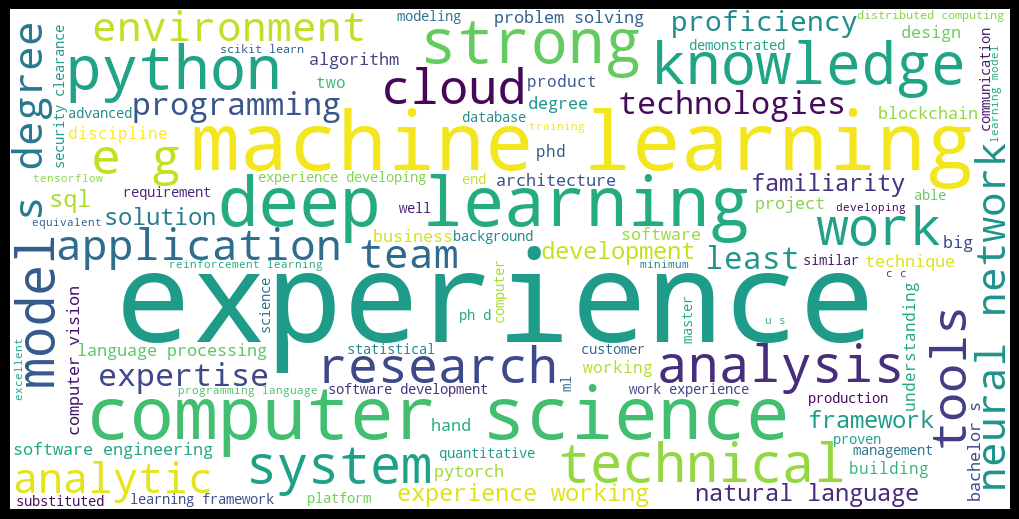

In [12]:
#| output: true
#| fig-cap: Figure 4. Wordcloud for job qualifications.

stopwords1 = STOPWORDS
stopwords1.update(["including","related","required","must","ability","year","years","etc","field","e.g","skill","skills","tool","using","data","one"])

text = df.loc[df["Qualifications"].isna()==False,"Qualifications"].tolist() 
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud1 = WordCloud(stopwords = stopwords1,
                      collocations=True,
                      max_words=100,
                      background_color="white",
                      width=1000, height=500).generate(text)

#plot the wordcloud object
plt.figure( figsize=(10,5), facecolor='k')
plt.imshow(wordcloud1, interpolation='bilInear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<br>
According to the graph above, among all the words appearing in the qualifications, 'experience' is the word that occurs the most frequently, from which we can learn that it is important to have sufficient practical experience. Because some technical words like 'machine learning', 'deep learning', etc. are used as keywords, their frequent occurrences are not surprising. Disregarding these words, some words including 'programming', 'database', etc. are shown apparently, which indicates again the importance of hands-on skills. At the meanwhile, 'team', 'proficiency', and 'problem solving' present a personal competence requirement beyond technology.

## What are the general duties of the jobs？

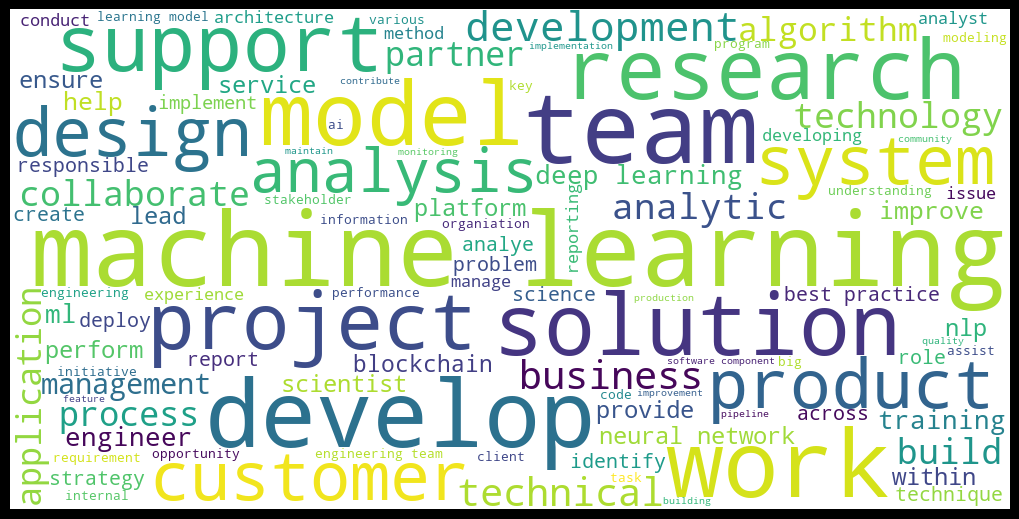

In [23]:
#| output: true
#| fig-cap: Figure 5. Wordcloud for job responsibilities.

stopwords2 = STOPWORDS
stopwords2.update(["new","need","use","working"])

text = df.loc[df["Responsibilities"].isna()==False,"Responsibilities"].tolist() 
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud2 = WordCloud(stopwords = stopwords2,
                      collocations=True,
                      max_words=100,
                      background_color="white",
                      width=1000, height=500).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordcloud2, interpolation='bilInear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<br>
There are several words that are eye-catching like 'team', 'solution', 'customer', 'product', 'business'. They are something indicating a higher level of specific business-related content, and these are specific problems to be solved on the basis of technology that is mentioned in qualifications.